<a href="https://colab.research.google.com/github/Fordalo/Data_SCIENCE_WORK/blob/main/Breastcancerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#wrangling
import pandas as pd
import numpy as np

#visualization
from matplotlib import pyplot as plt
import seaborn as sns

#machine learning
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
csvpath = '/content/gdrive/MyDrive/Colab Notebooks/Data Science projects/logistic regression complete/BreastCancer/breast cancer.csv'
breastdata = pd.read_csv(csvpath)

def printLevels(datainput):
  for column in datainput:
    try:
      uniquevalues = np.unique(datainput[column])
      Numof_values = len(uniquevalues)
      if Numof_values < 10:
        print('The number of values for feature "{}" is: {} ---- {} '.format(column, Numof_values, uniquevalues))

    except:
      print("An exception occurred")

printLevels(breastdata)

The number of values for feature "diagnosis" is: 2 ---- ['B' 'M'] 
The number of values for feature "Unnamed: 32" is: 1 ---- [nan] 


We seem to have some missing values, so lets take a look at all the columns and see how many NAN's we are dealing with

In [38]:
# import math
# print(math.isnan(breastdata.iloc[0,0]))
print(breastdata.isna().isna().sum())
print(breastdata.columns)
breastdata['Unnamed: 32']

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64
Index(['id', 'diagnosis', 'rad

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

It seems like only the last column (unnamed) has all the missing values. So we will capture some of the other variables for our Xinput.

In [39]:
xinput = breastdata[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'fractal_dimension_worst', 'area_worst']]
yinput = breastdata['diagnosis']

Now that we have our x and y inputs, I want to change our Yinput into a completely binary column with 0's and 1s. 

1 = Malignant
0 = Benign

In [40]:
#list comprehension
yinput = [0 if yinput[i] == 'B' else 1 for i in range(len(yinput))]

In [41]:
yinput = pd.DataFrame(yinput)
yinput.value_counts()

0    357
1    212
dtype: int64

Now lets visualize how some of our attributes interact with our independent column

In [42]:
import seaborn as sns

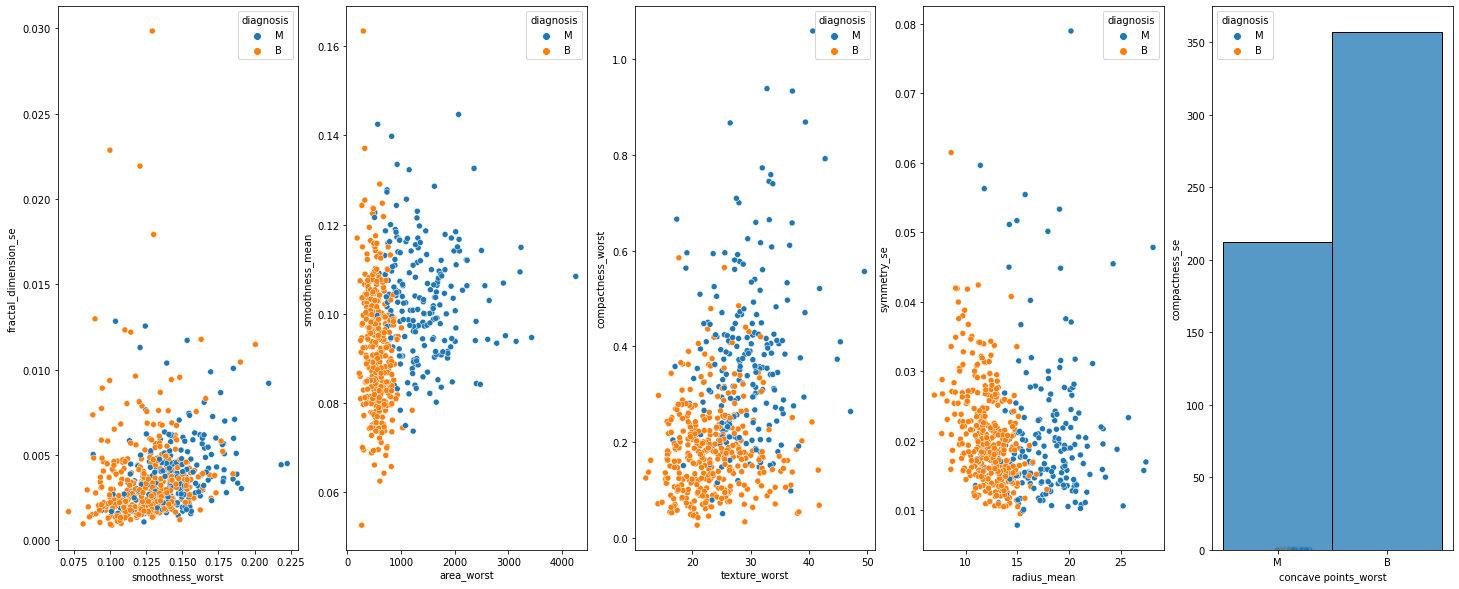

In [43]:
#sns.scatterplot(x = breastdata['area_mean'], y = breastdata['fractal_dimension_mean'], data= breastdata, hue= breastdata['diagnosis'])

fig, axs = plt.subplots(ncols=5, figsize=(25,10))
sns.scatterplot(x= 'smoothness_worst', y= 'fractal_dimension_se', data= breastdata, ax=axs[0], hue= breastdata['diagnosis'])
sns.scatterplot(x='area_worst', y= 'smoothness_mean', data= breastdata, ax=axs[1], hue= breastdata['diagnosis'])
sns.scatterplot(x='texture_worst',y= 'compactness_worst', data=breastdata, ax=axs[2], hue= breastdata['diagnosis'])
sns.scatterplot(x='radius_mean',y= 'symmetry_se', data= breastdata, ax=axs[3], hue= breastdata['diagnosis'])
sns.scatterplot(x='concave points_worst',y= 'compactness_se', data= breastdata, ax=axs[4], hue= breastdata['diagnosis'])
sns.histplot(data=breastdata, x="diagnosis")

In [44]:
xinput.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,fractal_dimension_worst,area_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.11890,2019.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.08902,1956.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.08758,1709.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,0.17300,567.7
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.07678,1575.0


In [45]:
xinput.insert(0, "intercept", 1)
xinput.head()

,intercept,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,fractal_dimension_worst,area_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.11890,2019.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.08902,1956.0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.08758,1709.0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,0.17300,567.7
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.07678,1575.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(xinput, yinput, random_state= 2007)
print('X_train shape: {} \nY_train shape: {} \nx_test shape: {} \ny_test shape: {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train shape: (426, 14) 
Y_train shape: (426, 1) 
x_test shape: (143, 14) 
y_test shape: (143, 1)


Now that we have successfully split or data, we can now perform our regression

In [61]:
logisticregr = LogisticRegression()
model_list = [logisticregr]
              


def process_regression(model, Xinput, yinput, folds):
  KF = KFold(n_splits = folds)
  Bri_scores = []

  #binary Score so we can compare it to SVM
  Bin_scores = []

  for trn_idx, tst_idx in KF.split(Xinput):
    X_train_set = np.array(Xinput.iloc[trn_idx])
    y_train_set = np.array(yinput.iloc[trn_idx])
    X_tst_set = np.array(Xinput.iloc[tst_idx])
    y_tst_set =  np.array(yinput.iloc[tst_idx])

    model.fit(X_train_set, y_train_set)

    betas = model.coef_
    bin_predictions = model.predict(X_tst_set)
    bin_score = model.score(X_tst_set, y_tst_set)

    proba_predictions = model.predict_proba(X_tst_set)
    S_i = -((y_tst_set - proba_predictions)**2)
    Brier_score = np.mean(S_i)

    Bri_scores.append(Brier_score)
    Bin_scores.append(np.mean(bin_score))

    print(f'Model: {model}')
    print('++++++++++++++++++++++++++++++++++')
    print(f'betas: {betas}')
    print('++++++++++++++++++++++++++++++++++')
    print(f'Binary Predictions: {bin_predictions[0:10]}')
    print('++++++++++++++++++++++++++++++++++')
    print(f'Proba Predictions: {proba_predictions[0:10]}')
    print('++++++++++++++++++++++++++++++++++')
    print(f'Brier Score: {Brier_score}')
    print('++++++++++++++++++++++++++++++++++')
    print(f'Bin Score: {Bin_scores}\n\n\n')

  
  scores = np.array(Bri_scores)
  Accuracy_scores= np.array(Bin_scores)
  print('AVG BRIER SCORE: {}'.format(scores.mean()))
  print('AVG ACCURACY SCORE: {}'.format(Accuracy_scores.mean()))


for i in model_list:
  process_regression(i, X_train, y_train, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Model: LogisticRegression()
++++++++++++++++++++++++++++++++++
betas: [[-0.51310257 -2.82456534  0.18068223  0.26041074 -0.00610875  0.42031041
   0.8241025   1.27836491  0.67910244  0.57756438  0.06153026  0.97807418
   0.35207285  0.0226558 ]]
++++++++++++++++++++++++++++++++++
Binary Predictions: [1 0 0 0 0 1 0 0 0 0]
++++++++++++++++++++++++++++++++++
Proba Predictions: [[0.12852915 0.87147085]
 [0.74958432 0.25041568]
 [0.54427046 0.45572954]
 [0.96494358 0.03505642]
 [0.98372975 0.01627025]
 [0.00718719 0.99281281]
 [0.99572756 0.00427244]
 [0.9921954  0.0078046 ]
 [0.94340723 0.05659277]
 [0.98982096 0.01017904]]
++++++++++++++++++++++++++++++++++
Brier Score: -0.4448650390933644
++++++++++++++++++++++++++++++++++
Bin Score: [0.9534883720930233]



Model: LogisticRegression()
++++++++++++++++++++++++++++++++++
betas: [[-5.75897025e-01 -3.21512415e+00  1.72665740e-01  2.84622779e-01
   7.03560159e-04  2.51613228e-01  8.20999816e-01  1.06415487e+00
   4.96671940e-01  3.25847496e-0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Now I want to see how the SVM performs with our data

In [62]:
SVMnod = svm.SVC()

def process_SVM(model, Xinput, yinput, folds):
  KF = KFold(n_splits = folds)
  scores = []

  for trn_idx, tst_idx in KF.split(Xinput):
    X_train_set = np.array(Xinput.iloc[trn_idx])
    y_train_set = np.array(yinput.iloc[trn_idx])
    X_tst_set = np.array(Xinput.iloc[tst_idx])
    y_tst_set =  np.array(yinput.iloc[tst_idx])

    model.fit(X_train_set, y_train_set)

    score = model.score(X_tst_set, y_tst_set)
    predictions = model.predict(X_tst_set[0:10])
    scores.append(score)

    print('Model: {} \n+++++++++++++++++\nPredictions: {} \n++++++++++++++++++++++++++++++++\nScore: {}'.format(model, predictions, score))
  
  scores = np.array(scores)
  print('AVG SCORE: {}'.format(scores.mean()))

process_SVM(SVMnod, X_train, y_train, 5)

Model: SVC() 
+++++++++++++++++
Predictions: [1 0 0 0 0 1 0 0 0 0] 
++++++++++++++++++++++++++++++++
Score: 0.9186046511627907
Model: SVC() 
+++++++++++++++++
Predictions: [1 0 0 0 0 0 0 0 0 0] 
++++++++++++++++++++++++++++++++
Score: 0.8588235294117647
Model: SVC() 
+++++++++++++++++
Predictions: [1 0 0 1 1 0 0 0 0 0] 
++++++++++++++++++++++++++++++++
Score: 0.8823529411764706
Model: SVC() 
+++++++++++++++++
Predictions: [0 0 0 0 0 0 0 0 0 0] 
++++++++++++++++++++++++++++++++
Score: 0.9176470588235294
Model: SVC() 
+++++++++++++++++
Predictions: [0 0 0 1 0 0 1 0 0 1] 
++++++++++++++++++++++++++++++++
Score: 0.9411764705882353
AVG SCORE: 0.9037209302325581


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Based on the scores from cross validation, it seems that logistic regression woulf fit the best. Lets proceed by using our out of sample test set and measure the performance of the model. I will also post coefficients so that we can see how our attributes are weighted. I will then show a confusion matrix from our predicted versus test data

#### Brier Score

A Brier Score is a metric to measure the accuracy of probabilistic forecasts. It is typically used when the outcome of a forecast is binary, that is, either the outcome occurs or it doesn't. For example, suppose a weather forecast says there is a 90% chance of rain and it actually does rain. We can calculate the Brier Score for this forecast using the following formula:

$(f - o)^2$

Where,

* $f$ is the forecasted probability
* $o$ is the actual outcome (1 if the event occurs, 0 if it doesn't)



A Brier Score for a set of forecasts is simply calculated as the average of the Brier Scores for the individual forecasts:

$\Sigma (f_t - o_t)^2 \times \frac{1}{n}$

In [65]:
OOS_logit = LogisticRegression()
OOS_logit.fit(X_train,y_train)
OOS_betas = OOS_logit.coef_
y_predict = np.array(OOS_logit.predict(X_test))
y_proba_predict = np.array(OOS_logit.predict_proba(X_test))
y_true = np.array(y_test)
S_i_2 = -((y_true - y_proba_predict)**2)
Brier_score2 = np.mean(S_i_2)

print('Model: LOGISTIC')
print('++++++++++++++++++++++++++++++++++')
print(f'betas: {OOS_betas}')
print('++++++++++++++++++++++++++++++++++')
print(f'Binary Predictions: {y_predict[0:10]}')
print('++++++++++++++++++++++++++++++++++')
print(f'Proba Predictions: {y_proba_predict[0:10]}')
print('++++++++++++++++++++++++++++++++++')
print(f'Brier Score: {Brier_score2}')
print('++++++++++++++++++++++++++++++++++')

Model: LOGISTIC
++++++++++++++++++++++++++++++++++
betas: [[-0.61021499 -3.2547356   0.20568239  0.30481091 -0.00425809  0.42249294
   0.83523375  1.39983519  0.77761689  0.59563632  0.05188092  1.05425168
   0.31329209  0.02303996]]
++++++++++++++++++++++++++++++++++
Binary Predictions: [1 0 0 0 0 1 0 1 1 0]
++++++++++++++++++++++++++++++++++
Proba Predictions: [[2.62479868e-04 9.99737520e-01]
 [9.68652889e-01 3.13471108e-02]
 [9.73432206e-01 2.65677937e-02]
 [7.75030762e-01 2.24969238e-01]
 [9.82691164e-01 1.73088363e-02]
 [1.79160808e-01 8.20839192e-01]
 [9.94707491e-01 5.29250851e-03]
 [4.48538143e-06 9.99995515e-01]
 [7.28183871e-07 9.99999272e-01]
 [9.69063693e-01 3.09363069e-02]]
++++++++++++++++++++++++++++++++++
Brier Score: -0.4599450315728402
++++++++++++++++++++++++++++++++++


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Lets do some charting for our model
ie confusin matrix, histogram plot